# Causal Inference With Multiple Categorical Target

This ended being our main causal inference model using the Causal Lift model. It is easy to use and works well will categorical data.  

Our main objective was to use our original data along with each demographic variable as a treatment. This might help us understand issues of bias/fairness as well as how to tackle other modeling tasks. We kept this to the original data to simplify the process as adding 991 would be a challenge and does not provide much more insights given our objective. The objective is to see how demographic factors have an effect on the different predicted categories and on the initial features that we used for our models.

We did this analysis by create treatment variables that are 1 if an observation is blow average and 0 if it is over in a certain category. This way, we can test based on each of the demographic variable. This is an approximation, but it is needed for such an analysis.

# Setup

We run this analysis by getting the causal_lift_model function from the CausalModel.py file. It sets the data into the right format and uses the Causal Lift package for the analysis.

In [1]:
import warnings
warnings.filterwarnings("ignore")
%run CausalModel.py
from CausalModel import causal_lift_model
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

We use our initial inputed data that is merged with demographics for the analysis.

In [2]:
df = pd.read_csv('../data/CRIME_DATA_WITH_MICE_IMPUTED_DEMOGRAPHICS.csv')
description_decoder = pd.read_csv('../data/Description_decoder_2.csv', names=['value', 'key']).set_index('key')['value'].to_dict()
df.drop(columns='Unnamed: 0', inplace=True)
df.columns

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Description', 'Post', 'District', 'Neighborhood', 'Longitude',
       'Latitude', 'Premise', 'Month', 'Hour', 'Year',
       'median_household_income', 'households_below_poverty', 'perc18_24',
       'perc25_64', 'perc65up', 'perc_asian', 'perc_aa', 'perc_hisp',
       'perc_white', 'median_price_homes_sold', 'racial_diversity_index',
       'num_households', 'Outside', 'Weapon_FIREARM', 'Weapon_HANDS',
       'Weapon_KNIFE', 'Weapon_NONE', 'Weapon_OTHER', 'Season_autumn',
       'Season_spring', 'Season_summer', 'Season_winter', 'Holiday',
       'Weekend'],
      dtype='object')

In [3]:
# Only for reference and not as useful when looking at multiple categories instead of binary
description_decoder

{0: 'AGG. ASSAULT',
 1: 'ARSON',
 2: 'ASSAULT BY THREAT',
 3: 'AUTO THEFT',
 4: 'BURGLARY',
 5: 'COMMON ASSAULT',
 6: 'HOMICIDE',
 7: 'LARCENY',
 8: 'LARCENY FROM AUTO',
 9: 'SEXUAL ASSULT',
 10: 'ROBBERY - CARJACKING',
 11: 'ROBBERY - COMMERCIAL',
 12: 'ROBBERY - RESIDENCE',
 13: 'ROBBERY - STREET',
 14: 'SHOOTING'}

# Is Below Average Median House Income

We would expect a below average median house income to be a driver in terms of violence and criminality. This should have an impact on the model when moderated for. 

Original data length 263121
Clean data length 263121

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-08 18:46:26,248|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-08 18:46:26,267|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-08 18:46:26,344|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:46:26,345|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:46:26,371|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-08 18:46:26,388|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-04-08 18:46:26,393|kedro.runner.sequential_runner|INFO] Compl

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour,Outside
coefficient,0.440629,0.310348,0.372136,-0.001046,0.435249,-0.000336,0.000286,0.000459,-0.000133,-0.059341


[2021-04-08 18:46:43,066|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:46:43,068|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:46:43,076|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-04-08 18:46:43,091|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-04-08 18:46:43,140|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


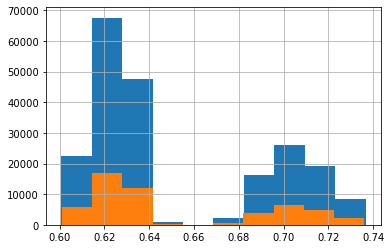

[2021-04-08 18:46:43,442|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,210496,2,0.652772,0.652772,1.0,0.789912,0.5,0.652772,1.0
test,52625,2,0.652770,0.652770,1.0,0.789910,0.5,0.652770,1.0


[2021-04-08 18:46:43,840|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,0,73090
True_1,0,137406


[2021-04-08 18:46:43,997|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,0,18273
True_1,0,34352


[2021-04-08 18:46:44,100|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:46:44,101|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:46:44,131|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.6527724992398906
[2021-04-08 18:46:44,132|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.6527695961995249


In [4]:
causal_lift_model(cm_df=df, decoder=description_decoder, treatment_name='median_household_income')

It's interesting to see high positive values for weapons that are key indicators for crime violence and for predicting description. We also see that using this treatment gives a higher relate score for both train and test than our original models and most other treatments. This is in line with our hypothesis.

# Is Below Average Poverty

We expect this to be a similar indicator as is below average median house income as both variables should be correlated.

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original data length 263121
Clean data length 263121

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-08 18:46:44,342|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-08 18:46:44,359|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-08 18:46:44,429|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:46:44,430|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:46:44,452|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-08 18:46:44,467|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-04-08 18:46:44,471|kedro.runner.sequential_runner|INFO] Compl

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour,Outside
coefficient,0.025825,0.061536,-0.056996,0.409212,-0.0777,-0.001519,-0.005542,0.00445,0.000901,0.10719


[2021-04-08 18:46:52,302|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:46:52,303|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:46:52,312|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-04-08 18:46:52,330|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-04-08 18:46:52,379|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


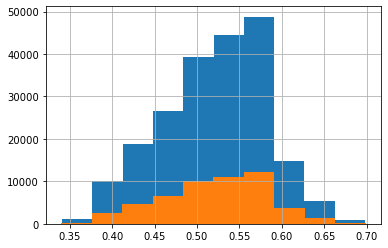

[2021-04-08 18:46:52,526|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,210496,2,0.549854,0.554863,0.687007,0.613905,0.543865,0.520917,0.644977
test,52625,2,0.545710,0.551544,0.684274,0.610781,0.539662,0.520912,0.646271


[2021-04-08 18:46:52,918|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,40411,60434
True_1,34320,75331


[2021-04-08 18:46:53,062|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,9960,15252
True_1,8655,18758


[2021-04-08 18:46:53,159|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:46:53,160|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:46:53,186|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.5209172620857403
[2021-04-08 18:46:53,187|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.5209121140142517


In [5]:
causal_lift_model(cm_df=df, decoder=description_decoder, treatment_name='households_below_poverty')

Again, we see weapons use as high coefficients in the model. However, the overall accuracy is lower than the model above that might indicate that this treatment is not as useful and indicative compared to the previous.

# Is Below Average Population Percentage 18-24

We would expect for a youth treatment variable to not have significant influence on the type of crime. 

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original data length 263121
Clean data length 263121

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-08 18:46:53,379|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-08 18:46:53,394|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-08 18:46:53,461|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:46:53,462|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:46:53,486|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-08 18:46:53,499|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-04-08 18:46:53,503|kedro.runner.sequential_runner|INFO] Compl

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour,Outside
coefficient,0.13235,0.067172,0.0,0.123579,0.058252,0.000261,0.005184,-0.001545,0.002284,-0.258417


[2021-04-08 18:47:06,846|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:06,848|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:06,856|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:06,873|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-04-08 18:47:06,923|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


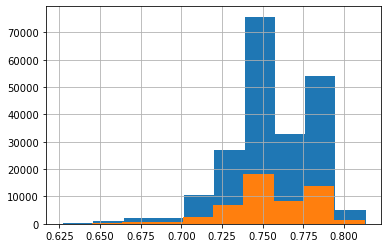

[2021-04-08 18:47:07,121|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,210496,2,0.756366,0.756366,1.0,0.861285,0.5,0.756366,1.0
test,52625,2,0.756371,0.756371,1.0,0.861288,0.5,0.756371,1.0


[2021-04-08 18:47:07,579|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,0,51284
True_1,0,159212


[2021-04-08 18:47:07,756|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,0,12821
True_1,0,39804


[2021-04-08 18:47:08,022|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:08,030|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:08,061|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.7563659166920037
[2021-04-08 18:47:08,062|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.7563705463182898


In [6]:
causal_lift_model(cm_df=df, decoder=description_decoder, treatment_name='perc18_24')

This a very interesting finding going against our initial hypothesis. Control for the youth treatment seems to be one of the highest indicators of the crime description. It has the best overall train and test accuracy with close to 76%. It also interesting to see a split between Firearm and No Weapon indicators. After looking into this variable more, Baltimore seems to have a serious youth criminality issue. We will investigate this further in our report.

Youth criminality has been dropping but there are racial disparities. Also, the article was wrote in 2019 and our data covers a much longer historical period.  
https://www.washingtonpost.com/local/public-safety/youth-arrests-in-baltimore-down-55percent-but-report-finds-racial-disparities/2019/04/28/b11a649e-66d5-11e9-8985-4cf30147bdca_story.html

# Is Below Average Population Percentage 25-64
We would expect for a youth treatment variable to not have significant influence on the type of crime. 

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original data length 263121
Clean data length 263121

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-08 18:47:08,280|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:08,297|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-08 18:47:08,370|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:08,373|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:08,397|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:08,411|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-04-08 18:47:08,414|kedro.runner.sequential_runner|INFO] Compl

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour,Outside
coefficient,0.59744,0.347658,0.359078,0.171434,0.457315,-0.00107,0.002186,-0.003114,0.001402,-0.113552


[2021-04-08 18:47:18,731|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:18,733|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:18,743|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:18,759|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-04-08 18:47:18,813|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


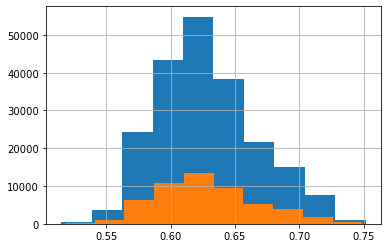

[2021-04-08 18:47:18,968|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,210496,2,0.628183,0.628183,1.0,0.771637,0.5,0.628183,1.0
test,52625,2,0.628181,0.628181,1.0,0.771635,0.5,0.628181,1.0


[2021-04-08 18:47:19,360|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,0,78266
True_1,0,132230


[2021-04-08 18:47:19,513|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,0,19567
True_1,0,33058


[2021-04-08 18:47:19,619|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:19,620|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:19,648|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.6281829583460018
[2021-04-08 18:47:19,649|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.6281805225653206


In [7]:
causal_lift_model(cm_df=df, decoder=description_decoder, treatment_name='perc25_64')

This is against our hypothesis again and still indicates violence in younger people. The coefficients for different weapons are even higher and positively significant here which supports our results for above. 

# Is Below Average Population Percentage Over 65
We would expect for a youth treatment variable to not have significant influence on the type of crime. 

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original data length 263121
Clean data length 263121

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-08 18:47:19,864|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:19,880|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-08 18:47:19,956|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:19,958|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:19,982|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:20,001|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-04-08 18:47:20,006|kedro.runner.sequential_runner|INFO] Compl

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour,Outside
coefficient,-0.073319,0.061935,0.136603,0.022915,0.099131,-0.002313,-0.000375,0.001603,-0.001471,0.082225


[2021-04-08 18:47:35,744|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:35,748|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:35,759|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:35,775|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-04-08 18:47:35,819|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


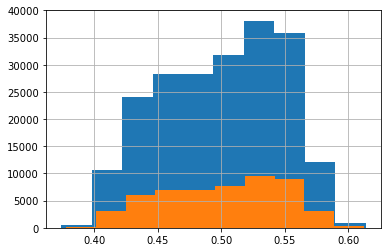

[2021-04-08 18:47:35,974|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,210496,2,0.547293,0.544695,0.574684,0.559288,0.547301,0.499848,0.527369
test,52625,2,0.544665,0.541982,0.574948,0.557978,0.544674,0.499857,0.530261


[2021-04-08 18:47:36,439|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,54737,50543
True_1,44750,60466


[2021-04-08 18:47:36,595|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,13539,12781
True_1,11181,15124


[2021-04-08 18:47:36,701|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:36,704|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:36,732|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.4998479781088477
[2021-04-08 18:47:36,733|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.49985748218527315


In [8]:
causal_lift_model(cm_df=df, decoder=description_decoder, treatment_name='perc65up')

The effects here are more negligable with lower accuracy and in line with our expectations.

# Is Below Average Percentage Asian

Race could possibly indicate type of crime when used as treatment. This is where we have to be even more careful to adjust for demographic bias.

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original data length 263121
Clean data length 263121

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-08 18:47:36,944|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:36,958|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-08 18:47:37,030|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:37,031|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:37,053|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:37,068|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-04-08 18:47:37,072|kedro.runner.sequential_runner|INFO] Compl

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour,Outside
coefficient,0.524136,0.362814,0.380666,0.042566,0.422644,0.002378,0.007158,0.001329,0.001338,-0.250463


[2021-04-08 18:47:47,936|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:47,937|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:47,945|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:47,962|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-04-08 18:47:48,009|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


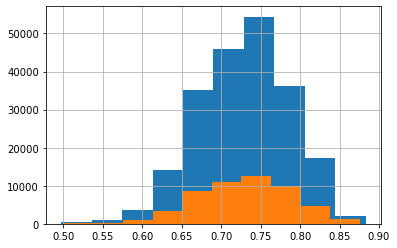

[2021-04-08 18:47:48,178|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,210496,2,0.729358,0.729360,0.999993,0.843501,0.500006,0.729358,0.99999
test,52625,2,0.729368,0.729368,1.000000,0.843508,0.500000,0.729368,1.00000


[2021-04-08 18:47:48,581|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,1,56968
True_1,1,153526


[2021-04-08 18:47:48,722|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,0,14242
True_1,0,38383


[2021-04-08 18:47:48,815|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:48,816|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:48,843|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.7293582775919732
[2021-04-08 18:47:48,845|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.7293681710213776


In [9]:
causal_lift_model(cm_df=df, decoder=description_decoder, treatment_name='perc_asian')

Indeed information on Asian racial information seems to have an impact on the model accuracy as well as different weapon indicators. A higher Asian percentage would indicate less use of weapons and vice versa.

# Is Below Average Percentage African American
Race could possibly indicate type of crime when used as treatment. This is where we have to be even more careful to adjust for demographic bias.

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original data length 263121
Clean data length 263121

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-08 18:47:49,053|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:49,069|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-08 18:47:49,140|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:49,141|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:49,170|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:49,186|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-04-08 18:47:49,190|kedro.runner.sequential_runner|INFO] Compl

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour,Outside
coefficient,-0.317521,-0.046989,-0.008336,0.242166,-0.107833,-0.002199,-0.002616,0.006961,-0.002817,0.152526


[2021-04-08 18:47:57,330|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:57,331|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:57,340|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:57,355|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-04-08 18:47:57,411|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


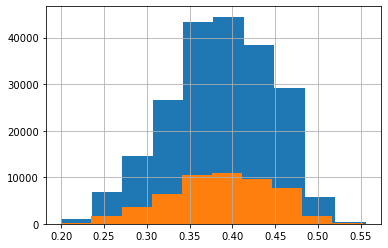

[2021-04-08 18:47:57,571|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,210496,2,0.613575,0.482824,0.009337,0.018320,0.501523,0.386169,0.007468
test,52625,2,0.613948,0.507614,0.009842,0.019309,0.501918,0.386166,0.007487


[2021-04-08 18:47:57,947|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,128396,813
True_1,80528,759


[2021-04-08 18:47:58,121|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,32109,194
True_1,20122,200


[2021-04-08 18:47:58,229|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:58,231|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:58,259|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.38616885831559744
[2021-04-08 18:47:58,260|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.38616627078384796


In [10]:
causal_lift_model(cm_df=df, decoder=description_decoder, treatment_name='perc_aa')

African American information also has an impact on the model, but accuracy is not as accurate so results are not as conclusive. A higher percentage of population might indicate a higher use of firearms and can affect crime description. It's interesting to see that the features are different to other demographic indicators. Keeping in mind this bias is important when trying to predict type of crime.

# Is Below Average Percentage Hispanic

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original data length 263121
Clean data length 263121

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-08 18:47:58,477|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:58,496|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-08 18:47:58,570|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:47:58,573|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:47:58,596|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-08 18:47:58,670|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-04-08 18:47:58,673|kedro.runner.sequential_runner|INFO] Compl

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour,Outside
coefficient,0.379601,0.28669,0.168556,0.28442,0.229458,0.000671,-0.002465,-0.000146,0.002691,-0.046713


[2021-04-08 18:48:10,970|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:10,971|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:10,980|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:11,001|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-04-08 18:48:11,045|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


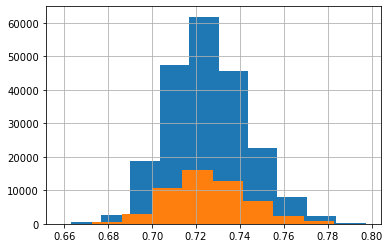

[2021-04-08 18:48:11,199|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,210496,2,0.725676,0.725676,1.0,0.841034,0.5,0.725676,1.0
test,52625,2,0.725682,0.725682,1.0,0.841038,0.5,0.725682,1.0


[2021-04-08 18:48:11,541|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,0,57744
True_1,0,152752


[2021-04-08 18:48:11,678|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,0,14436
True_1,0,38189


[2021-04-08 18:48:11,775|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:11,776|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:11,803|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.7256764974156279
[2021-04-08 18:48:11,804|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.7256817102137767


In [11]:
causal_lift_model(cm_df=df, decoder=description_decoder, treatment_name='perc_hisp')

Indeed information on Hispanic racial information, similarly to Asian demographic, seems to have an impact on the model accuracy as well as different weapon indicators. A higher Hispanic percentage would indicate less use of weapons and vice versa.

# Is Below Average Percentage White
Race could possibly indicate type of crime when used as treatment. This is where we have to be even more careful to adjust for demographic bias.

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original data length 263121
Clean data length 263121

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-08 18:48:11,991|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:12,005|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-08 18:48:12,070|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:12,072|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:12,094|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:12,107|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-04-08 18:48:12,111|kedro.runner.sequential_runner|INFO] Compl

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour,Outside
coefficient,0.452977,0.242711,0.197569,-0.077338,0.307995,0.000972,0.002913,-0.007234,0.002407,-0.109015


[2021-04-08 18:48:21,180|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:21,181|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:21,191|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:21,207|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-04-08 18:48:21,247|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


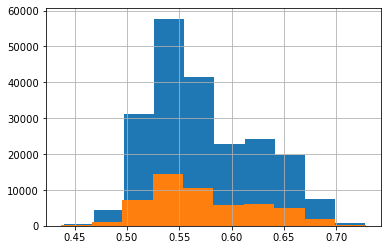

[2021-04-08 18:48:21,388|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,210496,2,0.572035,0.574838,0.973666,0.722891,0.503027,0.573313,0.971083
test,52625,2,0.572618,0.575112,0.974412,0.723314,0.503594,0.573302,0.971344


[2021-04-08 18:48:21,764|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,2909,86907
True_1,3178,117502


[2021-04-08 18:48:21,930|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,736,21719
True_1,772,29398


[2021-04-08 18:48:22,046|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:22,049|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:22,080|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.5733125570082092
[2021-04-08 18:48:22,081|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.5733016627078384


In [12]:
causal_lift_model(cm_df=df, decoder=description_decoder, treatment_name='perc_white')

Results here as not as accurate and conclusive. It is harder to interpret and racial diversity might be a better indicator than this. 

# Is Below Average Median Price Of Homes Sold
This should have a similar impact as median salary.

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original data length 263121
Clean data length 263121

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-08 18:48:22,288|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:22,303|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-08 18:48:22,372|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:22,373|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:22,395|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:22,409|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-04-08 18:48:22,412|kedro.runner.sequential_runner|INFO] Compl

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour,Outside
coefficient,0.283094,0.13328,0.090326,-0.186634,0.237536,-0.000568,0.003727,-0.002044,0.001573,-0.215518


[2021-04-08 18:48:32,137|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:32,140|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:32,148|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:32,167|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-04-08 18:48:32,203|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


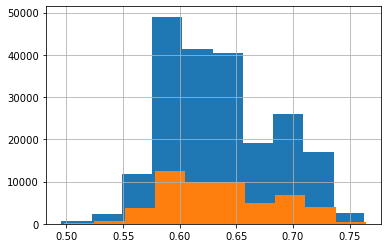

[2021-04-08 18:48:32,345|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,210496,2,0.635052,0.635086,0.999903,0.776794,0.499971,0.635100,0.999924
test,52625,2,0.635135,0.635122,1.000000,0.776849,0.500052,0.635097,0.999962


[2021-04-08 18:48:32,680|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,3,76807
True_1,13,133673


[2021-04-08 18:48:32,819|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,2,19201
True_1,0,33422


[2021-04-08 18:48:32,921|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:32,923|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:32,970|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.6350999543934327
[2021-04-08 18:48:32,972|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.6350973871733967


In [13]:
causal_lift_model(cm_df=df, decoder=description_decoder, treatment_name='median_price_homes_sold')

Decent overall accuracy but balanced across difference features making it hard to interpret.

# Is Below Average Racial Diversity Index

This could have an influence on the type of crime.

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original data length 263121
Clean data length 263121

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-08 18:48:33,180|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:33,194|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-08 18:48:33,259|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:33,261|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:33,286|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:33,302|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-04-08 18:48:33,307|kedro.runner.sequential_runner|INFO] Compl

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour,Outside
coefficient,0.128088,0.033606,0.00406,-0.211539,0.020507,-0.000241,0.001848,-0.004815,0.001165,-0.053912


[2021-04-08 18:48:43,233|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:43,234|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:43,243|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:43,257|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-04-08 18:48:43,295|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


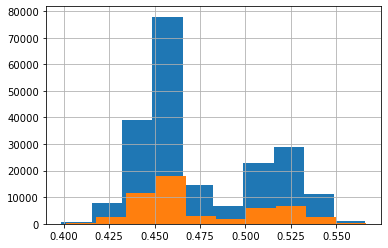

[2021-04-08 18:48:43,472|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,210496,2,0.535540,0.516487,0.325534,0.399359,0.525280,0.474318,0.298956
test,52625,2,0.533036,0.512285,0.323264,0.396394,0.522787,0.474318,0.299306


[2021-04-08 18:48:43,864|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,80227,30427
True_1,67340,32502


[2021-04-08 18:48:44,006|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,19982,7682
True_1,16892,8069


[2021-04-08 18:48:44,101|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:44,102|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:44,128|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.47431780176345395
[2021-04-08 18:48:44,129|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.47431828978622326


In [14]:
causal_lift_model(cm_df=df, decoder=description_decoder, treatment_name='racial_diversity_index')

The accuracy here is the lowest making it not very useful treatment. Might not be a good indicator to use.

# Is Below Average Number Of Households
Number of households could have an impact if we can associate it with higher population density and urbanization.

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original data length 263121
Clean data length 263121

[Estimate propensity scores for Inverse Probability Weighting.]
[2021-04-08 18:48:44,317|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:44,333|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-04-08 18:48:44,416|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:44,417|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:44,442|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:44,456|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-04-08 18:48:44,460|kedro.runner.sequential_runner|INFO] Compl

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour,Outside
coefficient,0.551954,0.340401,0.340591,0.070605,0.500952,-0.000243,0.00359,-0.004932,0.002097,-0.200214


[2021-04-08 18:48:55,461|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:55,462|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:55,472|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-04-08 18:48:55,490|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-04-08 18:48:55,527|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


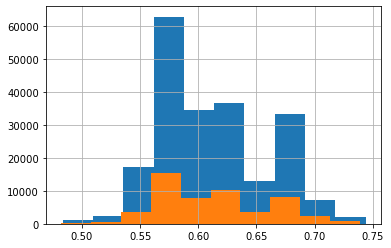

[2021-04-08 18:48:55,699|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,210496,2,0.611594,0.612023,0.998254,0.758819,0.499874,0.612083,0.998352
test,52625,2,0.611382,0.611957,0.997796,0.758636,0.499731,0.612086,0.998005


[2021-04-08 18:48:56,045|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,122,81533
True_1,225,128616


[2021-04-08 18:48:56,184|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,34,20380
True_1,71,32140


[2021-04-08 18:48:56,277|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-04-08 18:48:56,279|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-04-08 18:48:56,304|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.6120828899361508
[2021-04-08 18:48:56,305|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.6120855106888361


In [15]:
causal_lift_model(cm_df=df, decoder=description_decoder, treatment_name='num_households')

Not a very high accuracy, but some interesting results with a high impact on many weapon related features.